Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 995ms/step - accuracy: 0.5103 - loss: 0.7150 - val_accuracy: 0.5300 - val_loss: 0.6607
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.7213 - loss: 0.6406 - val_accuracy: 0.8600 - val_loss: 0.6129
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.9306 - loss: 0.5966 - val_accuracy: 0.8800 - val_loss: 0.5723
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.9177 - loss: 0.5624 - val_accuracy: 0.9400 - val_loss: 0.5397
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.9154 - loss: 0.5329 - val_accuracy: 0.9100 - val_loss: 0.5045
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.9391 - loss: 0.4935 - val_accuracy: 0.9600 - val_loss: 0.4758
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.9405 - loss: 0.4671 - val_accuracy: 0.9200 - val_loss: 0.4564
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.9314 - loss: 0.4434 - val_accuracy: 0

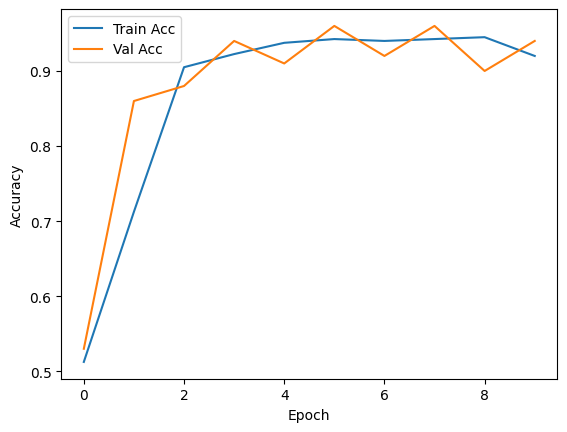

In [16]:
# Import dan setup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import os

img_size = (224, 224)
batch_size = 32

# Persiapan data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_dir = '/kaggle/input/pandasbears/Train'

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Bangun model CNN
base_model = ResNet50(include_top=False, input_shape=(*img_size, 3), weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Latih model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Step 6: Evaluate & Save Model
model.save("panda_bear_resnet_classifier.h5")

# Optional: Plot Training History
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
# Evaluasi model
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    '/kaggle/input/pandasbears/Test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

loss, acc = model.evaluate(test_data)
print(f"Akurasi di data test: {acc * 100:.2f}%")


Found 100 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8921 - loss: 0.4239
Akurasi di data test: 91.00%


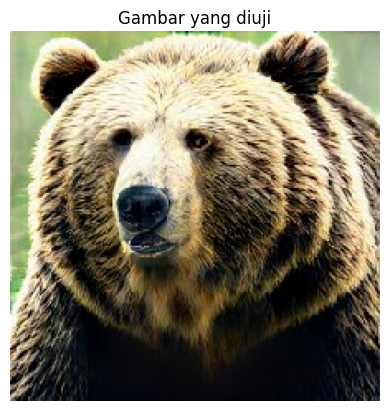

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/kaggle/input/pandasbears/Test/Bears/251.jpeg'  # Ganti nama file jika perlu

img = image.load_img(img_path, target_size=(224, 224))  # Ukuran sesuai input ResNet
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi

plt.imshow(img)
plt.axis('off')
plt.title("Gambar yang diuji")
plt.show()

In [19]:
from tensorflow.keras.models import load_model

model = load_model('panda_bear_resnet_classifier.h5')  # Sesuai nama file modelmu

In [20]:
prediction = model.predict(img_array)


classes = ['bear', 'panda']
predicted_class = classes[np.argmax(prediction)]
confidence = np.max(prediction)

print(f"Gambar diprediksi sebagai: {predicted_class} ({confidence * 100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Gambar diprediksi sebagai: bear (52.60%)
